In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

itemdata = pd.read_excel("StockTables.xlsx", sheet_name='Item')
categorydata = pd.read_excel("StockTables.xlsx", sheet_name='Category')
companydata = pd.read_excel("StockTables.xlsx", sheet_name='Company')
masterdata= pd.read_excel("StockTables.xlsx", sheet_name='Master')
detailsdata= pd.read_excel("StockTables.xlsx", sheet_name='Details')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
detailsdata.shape

(87026, 27)

In [4]:
masterdata.shape

(44545, 29)

In [5]:
detailsdata['Type'].unique()

array(['BUY', 'IISS', 'IREC', 'IRTB', 'IRTS', 'SALE', 'ITRF'],
      dtype=object)

In [6]:
masterdata['Type'].unique()

array(['BUY', 'IISS', 'IREC', 'IRTB', 'IRTS', 'SALE', 'ITRF'],
      dtype=object)

In [7]:
detailsdata.head()

,Id,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,Unnamed: 17,Unnamed: 18,CategoryId,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9307,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 20:16:58.380,70.32.28.35,NaN,NaN,NaT,NaN,NaN
1,9309,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:14:21.210,70.32.28.35,NaN,NaN,NaT,NaN,NaN
2,9310,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:15:19.717,70.32.28.35,NaN,NaN,NaT,NaN,NaN
3,9311,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:16:08.377,70.32.28.35,NaN,NaN,NaT,NaN,NaN
4,9312,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:23:50.563,70.32.28.35,NaN,NaN,NaT,NaN,NaN


In [8]:
masterdata.head()

,Id,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,TotalAmount,DiscountRate,DiscountAmount,GrossAmount,VatRate,VatAmount,OtcAmount,TotalNet,Cash,Credit,Remarks,Unnamed: 20,CategoryId,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,483153,101,BUY,2017-11-27,2017,20170002,NaN,10102.0,1.012030e+09,188282.50,0.0,0.0,188282.50,16.0,30125.20,76.85,218484.55,218484.55,0.00,NaN,ASLSERVER,10101,2020-01-27 20:51:01.693,192.168.1.10,NaN,NaN,NaT,NaN,NaN
1,5705,101,BUY,2018-01-16,2018,20180002,NaN,10102.0,1.012030e+09,698016.80,0.0,0.0,698016.80,16.0,111682.69,263197.17,1072896.66,0.00,1072896.66,sale no 31 lot no 217,ASLSERVER,10101,2018-03-05 11:52:14.220,70.32.28.35,NaN,10101.0,2020-03-15 11:08:07.250,192.168.1.10,NaN
2,5708,101,BUY,2018-02-17,2018,20180003,NaN,10102.0,1.012030e+09,359659.05,0.0,0.0,359659.05,0.0,0.00,0.00,359659.05,0.00,359659.05,SEAL 40 LOT NO 340,mi3-wsr1,10101,2018-03-05 19:17:28.887,70.32.28.35,NaN,10101.0,2018-03-06 18:54:54.173,70.32.28.35,NaN
3,5709,101,BUY,2018-01-15,2018,20180004,NaN,10102.0,1.012030e+09,255074.02,0.0,0.0,255074.02,0.0,0.00,0.00,255074.02,0.00,255074.02,SALE NO 35,mi3-wsr1,10101,2018-03-05 19:37:39.390,70.32.28.35,NaN,10101.0,2018-03-06 19:01:07.343,70.32.28.35,NaN
4,5710,101,BUY,2018-02-20,2018,20180005,NaN,10102.0,1.012030e+09,381572.87,0.0,0.0,381572.87,0.0,0.00,0.00,381572.87,0.00,381572.87,SALE 41,mi3-wsr1,10101,2018-03-05 19:43:34.087,70.32.28.35,NaN,10101.0,2018-03-05 20:05:19.653,70.32.28.35,NaN


In [9]:
companydata.head()

,SL,CompanyId,CompanyName,Address,Contact,Email,Status,PC,UserId,InserTime,InsertIP,InsertLocation,UpdateId,UpdateTime,UpdateIP,UpdateLocation
0,1,101,MILLENNIUM TEA TRADERS,"1558,Century Tower,Haji Para, Excess Road,Agra...",8801853914141,milltea.traders@yahoo.com,A,WIN-TG1O2GCI8A1,NaN,NaT,NaN,NaN,10001.0,2021-11-09 13:17:22.887,103.148.14.3,"22.3475365,91.8123324"
1,2,102,COMPLETE ELECTRONICS & TECHNOLOGIES,"86, Bangabondhu National Stadium Market, Motij...",8801711505466,cetbd15@gmail.com,A,mi3-wsr1,NaN,NaT,NaN,NaN,10001.0,2018-01-30 13:43:22.913,70.32.28.35,"22.3475365,91.8123324"
2,3,103,Demo Shop,"Lalkhan Bazar, Chittagong",8801232323222,demo@gmail.com,A,mi3-wsr1,10001.0,2015-04-21 10:59:51,192.168.0.24,"22.360049600000004,91.82729119999999",10001.0,2018-01-30 13:31:18.543,70.32.28.35,"22.360190499999998,91.82745419999999"
3,4,104,New Vision Medi System,"17/2,3rd Floor, New Eskaton Road, Moghbazar, D...",8801819281713,newvisionmed@gmail.com,A,sv57,10001.0,2015-06-22 11:12:15,142.4.49.156,"22.366667,91.8",10001.0,2016-02-02 13:29:26.897,142.4.49.156,"22.3475365,91.8123324"
4,5,105,M/S. S.N. MACHINERY,"Chodhury Machinery Market, 371/386, Enayet Baz...",8801711712162,snmachinary@gmail.com,I,sv57,10001.0,2016-12-20 14:55:26,50.115.33.83,NaN,10001.0,2017-07-20 16:58:14.713,50.115.33.82,"22.3649576,91.8269669"


In [10]:
itemdata.head()

,Id,CompanyId,CategoryId,ItemId,Name,Brand,Unit,BuyRate,SaleRate,MinStock,DiscountRate,CartonPieceQty,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,156,101,10101,101010001,MTT-MHT-500 MILLENNIUM HOTEL 500 GM,Hotel,500 Gm,300.0,320.0,15000.0,0.0,0.0,NaN,sv57,10101.0,2016-01-05 16:55:09.707,142.4.49.156,"22.3599283,91.82703690000001",10101.0,2021-03-18 10:21:19.543,103.148.14.3,"22.3442719,91.8139222"
1,158,101,10101,101010003,MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM,CLONE,500 gm,315.0,320.0,8500.0,0.0,0.0,NaN,sv57,10101.0,2016-01-05 16:56:34.240,142.4.49.156,"22.359916899999998,91.8270403",10101.0,2021-03-18 10:21:39.793,103.148.14.3,"22.3442719,91.8139222"
2,160,101,10101,101010005,MTT-MBT-500 MILLENNIUM BLACK TEA 500 GM,BLACK,500 GM,260.0,300.0,9520.0,0.0,0.0,NaN,sv57,10101.0,2016-01-05 16:57:00.223,142.4.49.156,"22.3599233,91.82704009999999",10101.0,2021-03-18 10:21:55.497,103.148.14.3,"22.3442719,91.8139222"
3,161,101,10101,101010006,Mill Tea CD Clone,cd,500 gm,265.0,270.0,6000.0,0.0,0.0,NaN,sv57,10101.0,2016-01-05 16:57:16.350,142.4.49.156,"22.359909599999998,91.8270459",10101.0,2021-03-18 10:22:11.497,103.148.14.3,"22.3442719,91.8139222"
4,608,101,10101,101010007,MTT-MBT-100 MILLENNIUM BLACK TEA 100GM,pack,100 gm,330.0,360.0,8000.0,0.0,0.0,NaN,sv57,10101.0,2016-05-31 12:46:22.020,142.4.49.156,NaN,10101.0,2021-03-18 10:22:21.967,103.148.14.3,"22.3442719,91.8139222"


In [11]:
# frames = [detailsdata, masterdata]

# detailsdata = pd.concat(frames)

In [12]:
#make a directory use CompanyId and CompanyName
list1=dict(zip(companydata.CompanyId, companydata.CompanyName))
list1

{101: 'MILLENNIUM TEA TRADERS',
 102: 'COMPLETE ELECTRONICS & TECHNOLOGIES',
 103: 'Demo Shop ',
 104: 'New Vision Medi System',
 105: 'M/S. S.N. MACHINERY',
 106: 'Padma LPG Limited-Factory',
 107: 'Unified Communications Ltd',
 108: 'SUNGLAZE',
 109: 'TWIN MOTORS',
 110: 'M/S Laila Enterprise',
 111: 'S.L. Corporation',
 112: 'Z.M.S Steel/M. Corporation',
 113: 'SAFWAN MOTORS',
 114: 'Woodland Door & Design',
 115: 'M/S ISLAM STORE',
 116: 'M/S. S.S Enterprise(Sister Concern of Kohinoor Cables)',
 117: 'Shah Amir Fish Traders',
 118: 'Woodland Door Gallery'}

In [13]:
#make a directory use ItemId and Name
list2=dict(zip(itemdata.ItemId, itemdata.Name))
list2

{101010001: 'MTT-MHT-500 MILLENNIUM HOTEL 500 GM',
 101010003: 'MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM',
 101010005: 'MTT-MBT-500 MILLENNIUM BLACK TEA 500 GM',
 101010006: 'Mill Tea CD Clone',
 101010007: 'MTT-MBT-100 MILLENNIUM BLACK TEA 100GM',
 101010012: 'MTT-MST-500 MILLENNIUM SPECIAL TEA 500 GM',
 101010014: 'MST',
 101010015: 'MTT-MST-200 MILLENNIUM SPECIAL TEA 200 GM',
 101010016: 'MTT-MST-1000 MILLENNIUM SPECIAL TEA 500*2 GM',
 101010017: 'BSTEAm',
 101010019: 'MTT-MHT-1000 MILLENNIUM HOTEL TEA 500*2 GM',
 101010021: 'MTT-MBT-1000 MILLENNIUM BLACK TEA 500*2 GM',
 101010022: 'MTT-DMS-500  DIVIBESAVERY TEA 500 GM',
 101010023: 'MTT-INBT-BLACK 500 GM',
 101010024: 'MTT-INST-SPECIAL 500 GM',
 101010025: 'MTT-INST-SPECIAL 200 GM',
 101010026: 'MMT-MCT- MILLENNIUM CLONE  500 GM*2 ',
 101010027: nan,
 101010028: 'MCT',
 101010029: 'GREEN TEA',
 101010031: 'GREEN TEA  80g (40bags)',
 101010032: 'AMLOKI TEA   80 GM  (40bags)',
 101010033: 'TRIPHALA TEA  80 GM (40bags)',
 101010034: 'A

In [14]:
#make a directory use ItemId and Name
list3=dict(zip(categorydata.CategoryId, categorydata.CategoryName))
list3

{10101: 'TEA',
 10102: 'STATIONARY',
 10103: 'LEAF',
 10104: 'RBM MULTI TRADE CORPORATION',
 10105: 'BANK',
 10106: 'PRODUCTS',
 10107: 'BLANK PACKET',
 10108: 'PRINTING PACKET',
 10109: 'l',
 10110: ' MILLENNIUM HANEY ',
 10111: 'MODE',
 10112: 'MILLENNIUM MODU',
 10113: 'KOYEL',
 10114: 'COIL',
 10115: 'SALT',
 10116: 'Mustard oil',
 10117: 'Mizeenia Floor 1 (Godown)',
 10118: 'PUFFED RICE',
 10119: 'MILL  SALT',
 10120: 'LENTIL ',
 10121: 'Aromatic Clnlgura Rice',
 10122: 'FOOD',
 10123: 'চিনি গুডা Aromatic Chinigura Rice 1kg',
 10124: 'মুসুর ডাল Lentil',
 10125: 'চিনি  sugar',
 10126: 'OIL',
 10127: 'SUGAR',
 10128: 'DR.H & H TEA',
 10129: 'Packing Machine',
 10130: 'MODHU HONEY (মধু)',
 10131: 'PUFFED RICE মুড়ি',
 10132: 'Sugar চিনি 1kg',
 10133: 'Aromatic Chinigura চিনি গুডা Rice 1kg',
 10134: 'Puffed Rice মুড়ি  kg',
 10135: 'MTT -PUFFED RICE',
 10136: 'Aromatic Chinigura ',
 10137: 'STATIONERY',
 10138: 'SPOON ',
 10139: 'PALATE',
 10140: 'BUCKET - BULTI ',
 10141: 'PALATE PC- '

In [15]:
data1=detailsdata.CompanyId.map(list1)
data1

0        MILLENNIUM TEA TRADERS
1        MILLENNIUM TEA TRADERS
2        MILLENNIUM TEA TRADERS
3        MILLENNIUM TEA TRADERS
4        MILLENNIUM TEA TRADERS
                  ...          
87021     Woodland Door Gallery
87022     Woodland Door Gallery
87023     Woodland Door Gallery
87024     Woodland Door Gallery
87025     Woodland Door Gallery
Name: CompanyId, Length: 87026, dtype: object

In [16]:
data2=detailsdata.ItemId.map(list2)
data2

0                                   OODALEAH BOP
1                                     JHEMAI  PF
2                             MOOMINCHERRA  GBOP
3                              MOOMINCHERRA  FOF
4                                 AMEENABAD FBOP
                          ...                   
87021        LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022       LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023                 SEGUN CTG -39''X81''X1.5''
87024                       BENGAL DOOR- 4'' (R)
87025    MEAHGONI DOOR FRAME- 42'X84''X6''X2.5''
Name: ItemId, Length: 87026, dtype: object

In [17]:
data3=detailsdata.CategoryId.map(list3)
data3

0         TEA
1         TEA
2         TEA
3         TEA
4         TEA
         ... 
87021    DOOR
87022    DOOR
87023    DOOR
87024    DOOR
87025    DOOR
Name: CategoryId, Length: 87026, dtype: object

In [18]:
#create dataFrame 
data1=pd.DataFrame(data1)
data1

,CompanyId
0,MILLENNIUM TEA TRADERS
1,MILLENNIUM TEA TRADERS
2,MILLENNIUM TEA TRADERS
3,MILLENNIUM TEA TRADERS
4,MILLENNIUM TEA TRADERS
...,...
87021,Woodland Door Gallery
87022,Woodland Door Gallery
87023,Woodland Door Gallery
87024,Woodland Door Gallery


In [19]:
#create dataFrame 
data2=pd.DataFrame(data2)
data2

,ItemId
0,OODALEAH BOP
1,JHEMAI PF
2,MOOMINCHERRA GBOP
3,MOOMINCHERRA FOF
4,AMEENABAD FBOP
...,...
87021,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,SEGUN CTG -39''X81''X1.5''
87024,BENGAL DOOR- 4'' (R)


In [20]:
data3=pd.DataFrame(data3)
data3

,CategoryId
0,TEA
1,TEA
2,TEA
3,TEA
4,TEA
...,...
87021,DOOR
87022,DOOR
87023,DOOR
87024,DOOR


In [21]:
detailsdata.head()

,Id,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,Unnamed: 17,Unnamed: 18,CategoryId,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9307,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 20:16:58.380,70.32.28.35,NaN,NaN,NaT,NaN,NaN
1,9309,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:14:21.210,70.32.28.35,NaN,NaN,NaT,NaN,NaN
2,9310,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:15:19.717,70.32.28.35,NaN,NaN,NaT,NaN,NaN
3,9311,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:16:08.377,70.32.28.35,NaN,NaN,NaT,NaN,NaN
4,9312,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,NaN,mi3-wsr1,10101,2018-02-21 19:23:50.563,70.32.28.35,NaN,NaN,NaT,NaN,NaN


In [22]:
detailsdata.drop(['Id','Unnamed: 17','Unnamed: 18','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],axis=1, inplace=True)

In [23]:
detailsdata.head()

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101


In [24]:
detailsdata = pd.concat([detailsdata, data1], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery


In [25]:
detailsdata.columns.values[17] = "CompanyName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery


In [26]:
detailsdata = pd.concat([detailsdata, data2], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5''
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R)


In [27]:
detailsdata.columns.values[18] = "ItemName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5''
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5''
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5''
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R)


In [28]:
detailsdata = pd.concat([detailsdata, data3], axis=1)
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryId
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR


In [29]:
detailsdata.columns.values[19] = "CategoryName"
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR


In [30]:
detailsdata['day'] = detailsdata['Date'].dt.day
detailsdata['month'] = detailsdata['Date'].dt.month

In [31]:
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR,31,1
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,31,1
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR,1,2
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR,1,2


In [32]:
detailsdata['Day']=detailsdata['Year']*365+detailsdata['month']*30+detailsdata['day']

In [33]:
detailsdata

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR,31,1,738091
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,31,1,738091
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR,1,2,738091
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR,1,2,738091


In [34]:
# detailsdata.drop(['Date','day','month'],axis=1,inplace=True)
# detailsdata

In [35]:
detailsdata.Type.unique()

array(['BUY', 'IISS', 'IREC', 'IRTB', 'IRTS', 'SALE', 'ITRF'],
      dtype=object)

In [36]:
detailsdata.head(610)

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,5,101030382,20.0,230.0,4600.0,0.0,0.0,4600.0,10101,MILLENNIUM TEA TRADERS,JAFFLONG BOP,TEA,1,1,736601
606,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,7,101030356,15.0,230.0,3450.0,0.0,0.0,3450.0,10101,MILLENNIUM TEA TRADERS,RAM GAR GBOP C,TEA,1,1,736601
607,101,IISS,2018-01-01,2018,20180002,10102.0,NaN,NaN,1,101030057,20.0,290.0,5800.0,0.0,0.0,5800.0,10101,MILLENNIUM TEA TRADERS,NEPTUNE GBOP,TEA,1,1,736601
608,101,IISS,2018-01-01,2018,20180002,10102.0,NaN,NaN,2,101030356,15.0,270.0,4050.0,0.0,0.0,4050.0,10101,MILLENNIUM TEA TRADERS,RAM GAR GBOP C,TEA,1,1,736601


In [37]:
detailsdata.head(1573)

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,101,IISS,2020-08-11,2020,20200056,10101.0,NaN,NaN,2,101010007,1500.0,300.0,450000.0,0.0,0.0,450000.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-100 MILLENNIUM BLACK TEA 100GM,TEA,11,8,737551
1569,101,IISS,2020-08-11,2020,20200056,10101.0,NaN,NaN,3,101010012,13000.0,320.0,4160000.0,0.0,0.0,4160000.0,10101,MILLENNIUM TEA TRADERS,MTT-MST-500 MILLENNIUM SPECIAL TEA 500 GM,TEA,11,8,737551
1570,101,IISS,2020-08-11,2020,20200056,10101.0,NaN,NaN,4,101010022,1200.0,180.0,216000.0,0.0,0.0,216000.0,10101,MILLENNIUM TEA TRADERS,MTT-DMS-500 DIVIBESAVERY TEA 500 GM,TEA,11,8,737551
1571,101,IREC,2017-12-31,2017,20170001,NaN,10101.0,NaN,1,101010012,411.0,270.0,110970.0,0.0,0.0,110970.0,10101,MILLENNIUM TEA TRADERS,MTT-MST-500 MILLENNIUM SPECIAL TEA 500 GM,TEA,31,12,736596


In [38]:
detailsdata.head(2070)

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,101,IREC,2021-03-28,2021,20200108,NaN,10123.0,NaN,8,101150007,5.0,290.0,1450.0,0.0,0.0,1450.0,10101,MILLENNIUM TEA TRADERS,Salt (Rangdhanu) 1 kg x 25KG,TEA,28,3,737783
2066,101,IRTB,2020-02-13,2020,20200002,10102.0,NaN,1.012030e+09,1,101030044,50.0,250.0,12500.0,0.0,0.0,12500.0,10101,MILLENNIUM TEA TRADERS,CD S C,TEA,13,2,737373
2067,101,IRTS,2018-07-25,2018,20180001,NaN,10101.0,1.011030e+09,1,101010005,7.5,260.0,1950.0,0.0,0.0,1950.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-500 MILLENNIUM BLACK TEA 500 GM,TEA,25,7,736805
2068,101,IRTS,2018-09-20,2018,20180002,NaN,10101.0,1.011030e+09,1,101010005,7.0,287.0,2009.0,0.0,0.0,2009.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-500 MILLENNIUM BLACK TEA 500 GM,TEA,20,9,736860


In [39]:
detailsdata.head(11716)

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711,102,IRTS,2022-01-26,2022,20220008,NaN,10202.0,1.021030e+09,1,102010050,1.0,10866.0,10866.0,0.0,0.0,10866.0,10202,COMPLETE ELECTRONICS & TECHNOLOGIES,"BHS GRAND 515, 3 BURNER STAINLESS STEEL",WATER HEATER (GEYSER),26,1,738086
11712,102,ITRF,2016-10-18,2016,20160001,10201.0,10202.0,NaN,1,102030003,2.0,19000.0,38000.0,0.0,0.0,38000.0,10202,COMPLETE ELECTRONICS & TECHNOLOGIES,"JN1648T-RO, WATER PURIFIER",WATER HEATER (GEYSER),18,10,736158
11713,102,ITRF,2016-10-18,2016,20160001,10201.0,10202.0,NaN,2,102020001,10.0,7700.0,77000.0,0.0,0.0,77000.0,10202,COMPLETE ELECTRONICS & TECHNOLOGIES,D 30 (30 LITRE),WATER HEATER (GEYSER),18,10,736158
11714,102,ITRF,2016-10-31,2016,20160002,10201.0,10202.0,NaN,1,102020001,10.0,7700.0,77000.0,0.0,0.0,77000.0,10202,COMPLETE ELECTRONICS & TECHNOLOGIES,D 30 (30 LITRE),WATER HEATER (GEYSER),31,10,736171


In [40]:
detailsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87026 entries, 0 to 87025
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CompanyId       87026 non-null  int64         
 1   Type            87026 non-null  object        
 2   Date            87026 non-null  datetime64[ns]
 3   Year            87026 non-null  int64         
 4   TransactionNo   87026 non-null  int64         
 5   StoreFr         73210 non-null  float64       
 6   StoreTo         17295 non-null  float64       
 7   PartyId         76378 non-null  float64       
 8   ItemSl          87026 non-null  int64         
 9   ItemId          87026 non-null  int64         
 10  Qty             87026 non-null  float64       
 11  Rate            86954 non-null  float64       
 12  Amount          87023 non-null  float64       
 13  DiscountRate    86917 non-null  float64       
 14  DiscountAmount  87017 non-null  float64       
 15  Gr

In [41]:
buy_data = detailsdata[detailsdata['Type'] == 'BUY']
Iiss_data = detailsdata[detailsdata['Type'] == 'IISS']
Irec_data = detailsdata[detailsdata['Type'] == 'IREC']
Irtb_data = detailsdata[detailsdata['Type'] == 'IRTB']
Irts_data = detailsdata[detailsdata['Type'] == 'IRTS']
sale_data = detailsdata[detailsdata['Type'] == 'SALE']
Itrf_data = detailsdata[detailsdata['Type'] == 'ITRF']

In [42]:
sale_data.to_csv('sale_data1.csv')

In [43]:
buy_data

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
0,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,1,101030183,823.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,31,12,736596
1,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,3,101030360,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,JHEMAI PF,TEA,31,12,736596
2,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,4,101030222,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA GBOP,TEA,31,12,736596
3,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,5,101030224,220.0,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,MOOMINCHERRA FOF,TEA,31,12,736596
4,101,BUY,2017-12-31,2017,20170001,NaN,10102.0,1.012030e+09,6,101030387,548.5,0.0,0.0,0.0,0.0,0.0,10101,MILLENNIUM TEA TRADERS,AMEENABAD FBOP,TEA,31,12,736596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86984,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,5,118030014,1.0,9800.0,9800.0,0.0,0.0,9800.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,21,1,738081
86985,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,6,118030017,1.0,7600.0,7600.0,0.0,0.0,7600.0,11801,Woodland Door Gallery,GODA DOOR FRAME-48''X84''X11'X2.5'',DOOR,21,1,738081
86986,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,7,118060014,2.0,8000.0,16000.0,0.0,0.0,16000.0,11801,Woodland Door Gallery,ORIENTAL NATURAL COFFE PLANE 30''X84'' R,DOOR,21,1,738081
86987,118,BUY,2022-01-21,2022,20220008,NaN,11801.0,1.182030e+09,8,118060001,2.0,8000.0,16000.0,0.0,0.0,16000.0,11801,Woodland Door Gallery,ORIENTAL NATURAL COFFE PLANE 30''X84'' L,DOOR,21,1,738081


In [44]:
buy_data.CategoryName.unique()

array(['TEA', 'WATER HEATER (GEYSER) ', 'CHICKEN', 'BALL VALVE',
       'CST TYRE', 'INFUSION SET', 'Head 1', 'ECG', 'USG', 'CHANGCHAI',
       'Fiber Optics', 'REFLECTIVE GLASS', nan, 'Seal Group (Buket)',
       'SAFETY ITEM', 'OLD', 'SPARE PARTS', 'BATTERY', 'WOOD DOOR',
       'EXPORT ITEM', 'DOOR'], dtype=object)

# which category product buy more

In [45]:
new_buy=buy_data.groupby("CategoryName").sum()
new_buy

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
BALL VALVE,618,12102,121020051,0.0,61850.0,6.190180e+09,8,619160008,63.00,150230.00,2.600910e+06,0.0,0.0,2.600910e+06,61872,64,54,4418914
BATTERY,17402,311107,3111072283,0.0,1740503.0,1.743326e+11,8717,17408128425,2573.00,371874.50,6.460490e+05,0.0,0.0,6.460490e+05,1740970,3766,1601,113605851
CHANGCHAI,12600,242040,2420401226,0.0,1260124.0,1.261892e+11,2193,12618510798,8230.00,1566163.84,1.472096e+07,0.0,0.0,1.472096e+07,1260240,1495,291,88354825
CHICKEN,33578,658609,6586105401,0.0,3364003.0,3.363988e+11,457,33759580948,77181.00,2512754.00,5.711506e+07,0.0,0.0,5.711506e+07,3358126,5214,2049,240458969
CST TYRE,927,18153,181530107,0.0,92781.0,9.288270e+09,12,929570014,9.00,163.00,1.630000e+02,0.0,0.0,1.630000e+02,92799,119,81,6628394
DOOR,6608,113232,1132320245,0.0,660856.0,6.619368e+10,284,6610320662,217.00,487951.67,1.397660e+06,0.0,0.0,1.397660e+06,660856,1188,56,41332548
ECG,42536,825398,8253987118,0.0,4254009.0,4.259694e+11,1054,42629713126,6349.00,3422332.00,7.204052e+06,0.0,0.0,7.204052e+06,4254009,6275,2559,301353315
EXPORT ITEM,4329,74777,747770703,0.0,432940.0,4.336511e+10,37,4329780037,577975.90,5160.62,6.040950e+07,0.0,0.0,6.040950e+07,432937,688,336,27304373
Fiber Optics,1070,20180,201800035,0.0,107012.0,1.072030e+10,22,1070120036,9626.00,54691.96,1.051588e+06,0.0,0.0,1.051588e+06,107010,100,100,7368800


In [46]:
####################### TransactionNo analysis #######################

In [47]:
new_buy_t=buy_data.groupby("TransactionNo").sum()
new_buy_t

,CompanyId,Year,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
TransactionNo,,,,,,,,,,,,,,,,,
20150001,104,2015,0.0,10401.0,1.042030e+09,1,104080001,1.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746
20150003,416,8060,0.0,41604.0,4.168120e+09,10,416290013,10.0,1750000.0,2200000.0,0.0,0.0,2200000.0,41604,124,32,2942984
20150004,104,2015,0.0,10401.0,1.042030e+09,1,104250001,1.0,32500.0,32500.0,0.0,0.0,32500.0,10401,9,9,735754
20150005,1040,20150,0.0,104010.0,1.042030e+10,55,1041450031,35.0,0.0,0.0,0.0,0.0,0.0,104010,310,80,7357460
20150006,104,2015,0.0,10401.0,1.042030e+09,1,104260002,9.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220024,1446,26286,0.0,144613.0,1.448539e+10,79,1447912010,71.0,12610.0,26580.0,0.0,0.0,26580.0,144613,306,13,9595086
20220025,342,6066,0.0,34203.0,3.426090e+09,6,342120280,121.0,1400.0,10250.0,0.0,0.0,10250.0,34203,51,3,2214231
20220026,114,2022,0.0,11401.0,1.142030e+09,1,114220001,2.0,0.0,0.0,0.0,0.0,0.0,11401,23,1,738083


In [48]:
new_buy_t=new_buy_t.reset_index()

In [49]:
new_buy_t

,TransactionNo,CompanyId,Year,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
0,20150001,104,2015,0.0,10401.0,1.042030e+09,1,104080001,1.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746
1,20150003,416,8060,0.0,41604.0,4.168120e+09,10,416290013,10.0,1750000.0,2200000.0,0.0,0.0,2200000.0,41604,124,32,2942984
2,20150004,104,2015,0.0,10401.0,1.042030e+09,1,104250001,1.0,32500.0,32500.0,0.0,0.0,32500.0,10401,9,9,735754
3,20150005,1040,20150,0.0,104010.0,1.042030e+10,55,1041450031,35.0,0.0,0.0,0.0,0.0,0.0,104010,310,80,7357460
4,20150006,104,2015,0.0,10401.0,1.042030e+09,1,104260002,9.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,20220024,1446,26286,0.0,144613.0,1.448539e+10,79,1447912010,71.0,12610.0,26580.0,0.0,0.0,26580.0,144613,306,13,9595086
977,20220025,342,6066,0.0,34203.0,3.426090e+09,6,342120280,121.0,1400.0,10250.0,0.0,0.0,10250.0,34203,51,3,2214231
978,20220026,114,2022,0.0,11401.0,1.142030e+09,1,114220001,2.0,0.0,0.0,0.0,0.0,0.0,11401,23,1,738083
979,20220027,114,2022,0.0,11401.0,1.142030e+09,1,114100001,10.0,0.0,0.0,0.0,0.0,0.0,11401,25,1,738085


In [50]:
masterdata

,Id,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,TotalAmount,DiscountRate,DiscountAmount,GrossAmount,VatRate,VatAmount,OtcAmount,TotalNet,Cash,Credit,Remarks,Unnamed: 20,CategoryId,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,483153,101,BUY,2017-11-27,2017,20170002,NaN,10102.0,1.012030e+09,188282.50,0.0,0.0,188282.50,16.0,30125.20,76.85,218484.55,218484.55,0.00,NaN,ASLSERVER,10101,2020-01-27 20:51:01.693,192.168.1.10,NaN,NaN,NaT,NaN,NaN
1,5705,101,BUY,2018-01-16,2018,20180002,NaN,10102.0,1.012030e+09,698016.80,0.0,0.0,698016.80,16.0,111682.69,263197.17,1072896.66,0.00,1072896.66,sale no 31 lot no 217,ASLSERVER,10101,2018-03-05 11:52:14.220,70.32.28.35,NaN,10101.0,2020-03-15 11:08:07.250,192.168.1.10,NaN
2,5708,101,BUY,2018-02-17,2018,20180003,NaN,10102.0,1.012030e+09,359659.05,0.0,0.0,359659.05,0.0,0.00,0.00,359659.05,0.00,359659.05,SEAL 40 LOT NO 340,mi3-wsr1,10101,2018-03-05 19:17:28.887,70.32.28.35,NaN,10101.0,2018-03-06 18:54:54.173,70.32.28.35,NaN
3,5709,101,BUY,2018-01-15,2018,20180004,NaN,10102.0,1.012030e+09,255074.02,0.0,0.0,255074.02,0.0,0.00,0.00,255074.02,0.00,255074.02,SALE NO 35,mi3-wsr1,10101,2018-03-05 19:37:39.390,70.32.28.35,NaN,10101.0,2018-03-06 19:01:07.343,70.32.28.35,NaN
4,5710,101,BUY,2018-02-20,2018,20180005,NaN,10102.0,1.012030e+09,381572.87,0.0,0.0,381572.87,0.0,0.00,0.00,381572.87,0.00,381572.87,SALE 41,mi3-wsr1,10101,2018-03-05 19:43:34.087,70.32.28.35,NaN,10101.0,2018-03-05 20:05:19.653,70.32.28.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44540,917600,118,SALE,2022-02-01,2022,20220016,11801.0,NaN,1.181030e+09,10500.00,0.0,0.0,10500.00,0.0,0.00,0.00,10500.00,0.00,10500.00,MEMO NO-018,WIN-TG1O2GCI8A1,11801,2022-02-01 11:52:47.890,103.148.14.3,"22.3293456,91.7930751",NaN,NaT,NaN,NaN
44541,917601,118,SALE,2022-01-31,2022,20220017,11801.0,NaN,1.181030e+09,340800.00,0.0,0.0,340800.00,0.0,0.00,0.00,340800.00,0.00,340800.00,MEMO NO-019,PRINCE,11801,2022-02-01 11:58:42.607,103.148.14.3,"22.3293431,91.7930762",11801.0,2022-02-01 18:54:00.873,192.168.1.24,"22.3293431,91.7930762"
44542,917602,118,SALE,2022-01-31,2022,20220018,11801.0,NaN,1.181030e+09,107200.00,0.0,0.0,107200.00,0.0,0.00,0.00,107200.00,0.00,107200.00,MEMO NO-020,WIN-TG1O2GCI8A1,11801,2022-02-01 12:01:01.793,103.148.14.3,"22.3293463,91.7930767",NaN,NaT,NaN,NaN
44543,917604,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,72100.00,0.0,0.0,72100.00,0.0,0.00,0.00,72100.00,0.00,72100.00,MEMO NO-021,WIN-TG1O2GCI8A1,11801,2022-02-01 12:10:24.693,103.148.14.3,"22.3293442,91.7930748",NaN,NaT,NaN,NaN


In [51]:
list1=dict(zip(masterdata.TransactionNo, masterdata.TotalAmount))
list1

{20170002: 51930.0,
 20180002: 82192.0,
 20180003: 65000.0,
 20180004: 4000.0,
 20180005: 4200.0,
 20180006: 2200.0,
 20180007: 11260.0,
 20180008: 15000.0,
 20180009: 1350.0,
 20180010: 70000.0,
 20180011: 105600.0,
 20180012: 120000.0,
 20180013: 6750.0,
 20180014: 87000.0,
 20180015: 6250.0,
 20180016: 9000.0,
 20180018: 900000.0,
 20180019: 12000.0,
 20180020: 190000.0,
 20180021: 6250.0,
 20180022: 275000.0,
 20180023: 1800000.0,
 20180024: 1300.0,
 20180025: 13000.0,
 20180027: 2100.0,
 20180029: 3840.0,
 20180030: 3130000.0,
 20180034: 12500.0,
 20180036: 26000.0,
 20180037: 1250.0,
 20180038: 300000.0,
 20180039: 10580.0,
 20180040: 450.0,
 20180041: 1350.0,
 20180043: 85.0,
 20180044: 69000.0,
 20180045: 14300.0,
 20180046: 496.0,
 20180047: 1300.0,
 20180049: 17250.0,
 20180050: 1450000.0,
 20180054: 1300.0,
 20180055: 1300.0,
 20180056: 1300.0,
 20180057: 6500.0,
 20180058: 1300.0,
 20180059: 1300.0,
 20180060: 15000.0,
 20180061: 2500.0,
 20180062: 1350.0,
 20180063: 35100.

In [52]:
data1=new_buy_t.TransactionNo.map(list1)
data1

0       35000.0
1        2000.0
2       17000.0
3           NaN
4      230000.0
         ...   
976      6600.0
977      6450.0
978      6600.0
979      6450.0
980     10500.0
Name: TransactionNo, Length: 981, dtype: float64

In [53]:
data1=pd.DataFrame(data1)
data1

,TransactionNo
0,35000.0
1,2000.0
2,17000.0
3,NaN
4,230000.0
...,...
976,6600.0
977,6450.0
978,6600.0
979,6450.0


In [54]:
new_buy_t = pd.concat([new_buy_t, data1], axis=1)
new_buy_t

,TransactionNo,CompanyId,Year,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day,TransactionNo
0,20150001,104,2015,0.0,10401.0,1.042030e+09,1,104080001,1.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746,35000.0
1,20150003,416,8060,0.0,41604.0,4.168120e+09,10,416290013,10.0,1750000.0,2200000.0,0.0,0.0,2200000.0,41604,124,32,2942984,2000.0
2,20150004,104,2015,0.0,10401.0,1.042030e+09,1,104250001,1.0,32500.0,32500.0,0.0,0.0,32500.0,10401,9,9,735754,17000.0
3,20150005,1040,20150,0.0,104010.0,1.042030e+10,55,1041450031,35.0,0.0,0.0,0.0,0.0,0.0,104010,310,80,7357460,NaN
4,20150006,104,2015,0.0,10401.0,1.042030e+09,1,104260002,9.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,20220024,1446,26286,0.0,144613.0,1.448539e+10,79,1447912010,71.0,12610.0,26580.0,0.0,0.0,26580.0,144613,306,13,9595086,6600.0
977,20220025,342,6066,0.0,34203.0,3.426090e+09,6,342120280,121.0,1400.0,10250.0,0.0,0.0,10250.0,34203,51,3,2214231,6450.0
978,20220026,114,2022,0.0,11401.0,1.142030e+09,1,114220001,2.0,0.0,0.0,0.0,0.0,0.0,11401,23,1,738083,6600.0
979,20220027,114,2022,0.0,11401.0,1.142030e+09,1,114100001,10.0,0.0,0.0,0.0,0.0,0.0,11401,25,1,738085,6450.0


In [55]:
new_buy_t.columns.values[18] = "TotalAmount"
new_buy_t

,TransactionNo,CompanyId,Year,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day,TotalAmount
0,20150001,104,2015,0.0,10401.0,1.042030e+09,1,104080001,1.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746,35000.0
1,20150003,416,8060,0.0,41604.0,4.168120e+09,10,416290013,10.0,1750000.0,2200000.0,0.0,0.0,2200000.0,41604,124,32,2942984,2000.0
2,20150004,104,2015,0.0,10401.0,1.042030e+09,1,104250001,1.0,32500.0,32500.0,0.0,0.0,32500.0,10401,9,9,735754,17000.0
3,20150005,1040,20150,0.0,104010.0,1.042030e+10,55,1041450031,35.0,0.0,0.0,0.0,0.0,0.0,104010,310,80,7357460,NaN
4,20150006,104,2015,0.0,10401.0,1.042030e+09,1,104260002,9.0,0.0,0.0,0.0,0.0,0.0,10401,31,8,735746,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,20220024,1446,26286,0.0,144613.0,1.448539e+10,79,1447912010,71.0,12610.0,26580.0,0.0,0.0,26580.0,144613,306,13,9595086,6600.0
977,20220025,342,6066,0.0,34203.0,3.426090e+09,6,342120280,121.0,1400.0,10250.0,0.0,0.0,10250.0,34203,51,3,2214231,6450.0
978,20220026,114,2022,0.0,11401.0,1.142030e+09,1,114220001,2.0,0.0,0.0,0.0,0.0,0.0,11401,23,1,738083,6600.0
979,20220027,114,2022,0.0,11401.0,1.142030e+09,1,114100001,10.0,0.0,0.0,0.0,0.0,0.0,11401,25,1,738085,6450.0


In [56]:
new_buy_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionNo   981 non-null    int64  
 1   CompanyId       981 non-null    int64  
 2   Year            981 non-null    int64  
 3   StoreFr         981 non-null    float64
 4   StoreTo         981 non-null    float64
 5   PartyId         981 non-null    float64
 6   ItemSl          981 non-null    int64  
 7   ItemId          981 non-null    int64  
 8   Qty             981 non-null    float64
 9   Rate            981 non-null    float64
 10  Amount          981 non-null    float64
 11  DiscountRate    981 non-null    float64
 12  DiscountAmount  981 non-null    float64
 13  GrossAmount     981 non-null    float64
 14  CategoryId      981 non-null    int64  
 15  day             981 non-null    int64  
 16  month           981 non-null    int64  
 17  Day             981 non-null    int

In [57]:
new_buy_tan=buy_data.groupby("Year").sum()
new_buy_tan

,CompanyId,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
Year,,,,,,,,,,,,,,,,,
2015,4576,886600589,0.0,457644.0,4.584932e+10,97,4583610182,441.00,2684868.00,4.204152e+06,0.0,0.0,4.204152e+06,457644,946,399,32373816
2016,13462,2640981086,0.0,1346332.0,1.348619e+11,1902,13474121166,15475.00,1169019.00,7.210592e+07,0.0,0.0,7.210592e+07,1346412,3159,795,96422049
2017,29078,5647603456,0.0,2908573.0,2.912224e+11,2853,29121479622,41138.50,2045434.84,7.265105e+07,0.0,0.0,7.265105e+07,2908657,4303,1658,206191443
2018,25966,5105546658,0.0,2597215.0,2.600704e+11,538,25996882279,94445.20,276962.79,8.175403e+07,0.0,0.0,8.175403e+07,2596877,4029,1620,186404839
2019,62345,12275555010,0.0,6235936.0,6.246168e+11,4040,62505585877,285035.38,387597.31,1.399197e+08,0.0,0.0,1.399197e+08,6235612,9731,4029,448187081
2020,452363,83446240587,0.0,45243183.0,4.531948e+12,915052,453297781038,183315.40,3558343.15,2.604710e+08,0.0,0.0,2.604710e+08,45241642,96126,40256,3047090106
2021,527269,96887267026,0.0,52726448.0,5.280140e+12,68638,528361111181,1124494.29,9791175.56,5.849171e+08,0.0,0.0,5.849171e+08,52736746,94030,33838,3537475180
2022,21303,3781141810,0.0,2130535.0,2.134046e+11,646,21325444038,6791.00,642072.90,2.082036e+06,0.0,0.0,2.082036e+06,2130743,3322,187,138020542


In [58]:
new_buy_tan=new_buy_tan.reset_index()
new_buy_tan

,Year,CompanyId,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
0,2015,4576,886600589,0.0,457644.0,4.584932e+10,97,4583610182,441.00,2684868.00,4.204152e+06,0.0,0.0,4.204152e+06,457644,946,399,32373816
1,2016,13462,2640981086,0.0,1346332.0,1.348619e+11,1902,13474121166,15475.00,1169019.00,7.210592e+07,0.0,0.0,7.210592e+07,1346412,3159,795,96422049
2,2017,29078,5647603456,0.0,2908573.0,2.912224e+11,2853,29121479622,41138.50,2045434.84,7.265105e+07,0.0,0.0,7.265105e+07,2908657,4303,1658,206191443
3,2018,25966,5105546658,0.0,2597215.0,2.600704e+11,538,25996882279,94445.20,276962.79,8.175403e+07,0.0,0.0,8.175403e+07,2596877,4029,1620,186404839
4,2019,62345,12275555010,0.0,6235936.0,6.246168e+11,4040,62505585877,285035.38,387597.31,1.399197e+08,0.0,0.0,1.399197e+08,6235612,9731,4029,448187081
5,2020,452363,83446240587,0.0,45243183.0,4.531948e+12,915052,453297781038,183315.40,3558343.15,2.604710e+08,0.0,0.0,2.604710e+08,45241642,96126,40256,3047090106
6,2021,527269,96887267026,0.0,52726448.0,5.280140e+12,68638,528361111181,1124494.29,9791175.56,5.849171e+08,0.0,0.0,5.849171e+08,52736746,94030,33838,3537475180
7,2022,21303,3781141810,0.0,2130535.0,2.134046e+11,646,21325444038,6791.00,642072.90,2.082036e+06,0.0,0.0,2.082036e+06,2130743,3322,187,138020542


In [59]:
######################### TransactionNo ########################

In [60]:
new_buy=new_buy[['Qty','Amount','Rate']]
new_buy

,Qty,Amount,Rate
CategoryName,,,
BALL VALVE,63.00,2.600910e+06,150230.00
BATTERY,2573.00,6.460490e+05,371874.50
CHANGCHAI,8230.00,1.472096e+07,1566163.84
CHICKEN,77181.00,5.711506e+07,2512754.00
CST TYRE,9.00,1.630000e+02,163.00
DOOR,217.00,1.397660e+06,487951.67
ECG,6349.00,7.204052e+06,3422332.00
EXPORT ITEM,577975.90,6.040950e+07,5160.62
Fiber Optics,9626.00,1.051588e+06,54691.96


In [61]:
#base on Qty
new_buy.sort_values(by='Qty', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
EXPORT ITEM,577975.90,6.040950e+07,5160.62
TEA,376336.78,7.902607e+07,123217.41
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
REFLECTIVE GLASS,123991.00,1.027822e+07,249.00
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
CHICKEN,77181.00,5.711506e+07,2512754.00
Fiber Optics,9626.00,1.051588e+06,54691.96
CHANGCHAI,8230.00,1.472096e+07,1566163.84
SPARE PARTS,6975.00,1.158153e+06,759729.10


In [62]:
#base on amount
new_buy.sort_values(by='Amount', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
TEA,376336.78,7.902607e+07,123217.41
EXPORT ITEM,577975.90,6.040950e+07,5160.62
CHICKEN,77181.00,5.711506e+07,2512754.00
CHANGCHAI,8230.00,1.472096e+07,1566163.84
REFLECTIVE GLASS,123991.00,1.027822e+07,249.00
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
ECG,6349.00,7.204052e+06,3422332.00
WOOD DOOR,2335.00,5.181402e+06,2172054.55


In [63]:
#base on Rate
new_buy.sort_values(by='Rate', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),121291.00,9.585317e+08,5457735.00
ECG,6349.00,7.204052e+06,3422332.00
CHICKEN,77181.00,5.711506e+07,2512754.00
WOOD DOOR,2335.00,5.181402e+06,2172054.55
SAFETY ITEM,158227.50,8.796038e+06,1918550.92
CHANGCHAI,8230.00,1.472096e+07,1566163.84
SPARE PARTS,6975.00,1.158153e+06,759729.10
DOOR,217.00,1.397660e+06,487951.67
BATTERY,2573.00,6.460490e+05,371874.50


# ! yearly investment prediction  !

<AxesSubplot:xlabel='Year', ylabel='Amount'>

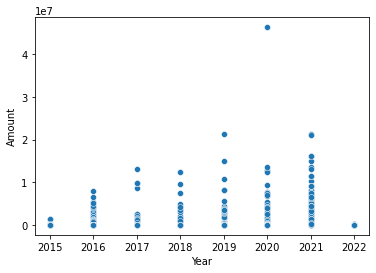

In [64]:
sns.scatterplot(x=buy_data.Year, y=buy_data.Amount, data=buy_data)

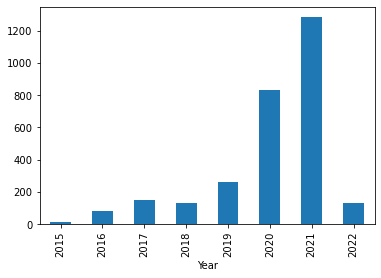

In [65]:
buy_data.groupby('Year')['Amount'].nunique().plot(kind='bar')
plt.show()

In [66]:
invest_year= {}
for year, year_data in buy_data.groupby('Year'):
            print(type,year, year_data['Amount'].sum())
            invest_year[year] =year_data['Amount'].sum() 

<class 'type'> 2015 4204152.0
<class 'type'> 2016 72105925.0
<class 'type'> 2017 72651047.12
<class 'type'> 2018 81754033.36
<class 'type'> 2019 139919702.32
<class 'type'> 2020 260470997.94
<class 'type'> 2021 584917111.97
<class 'type'> 2022 2082036.07


In [67]:
data = []
for year in invest_year:
    if(year!=2022):
        data.append([year, invest_year[year]])

df = pd.DataFrame(data, columns = ['Year', 'YearAmount'])
x = df.drop(['YearAmount'],axis='columns')
y = df.YearAmount

In [68]:
x

,Year
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [71]:
rnf=RandomForestRegressor()
svr=SVR()
lr=LinearRegression()
dr=DecisionTreeRegressor()

In [72]:
# lr.fit(x,y)
# acc_lr = round(lr.score(x, y) * 100, 2)

# rnf.fit(x,y)
# acc_rnf = round(rnf.score(x, y) * 100, 2)


# svr.fit(x,y)
# acc_svr = round(svr.score(x, y) * 100, 2)



# dr.fit(x,y)
# acc_dr = round(dr.score(x, y) * 100, 2)


In [73]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_lr = r2_score(y_test,y_pred)

rnf.fit(x_train,y_train)
y_pred=rnf.predict(x_test)
acc_rnf =r2_score(y_test,y_pred)

svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
acc_svr = r2_score(y_test,y_pred)


dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
acc_dr =r2_score(y_test,y_pred)

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Rgression',
              'Random Forest Regression','Decision Tree Regression'],
    'Score': [acc_svr, acc_lr,
              acc_rnf, acc_dr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree Regression,0.197092
1,Linear Rgression,0.171443
2,Random Forest Regression,-0.048187
0,Support Vector Machines,-0.930183


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
value = scaler.fit_transform([[2022]])

In [76]:
print("2022  orginal amount 2082036.07tk ")
lr_predict=lr.predict(value)
print("2022 predict amount ", lr_predict ,"tk of Linear Rgression")
rnf_predict=rnf.predict(value)
print("2022 predict amount ", rnf_predict, "tk of Random Forest Regression")
svr_predict=svr.predict(value)
print("2022 predict amount", svr_predict, "tk of Support Vector Machines")
dr_predict=dr.predict(value)
print("2022 predict amount", dr_predict, "tk of Decision Tree Regression")

2022  orginal amount 2082036.07tk 
2022 predict amount  [1732228.24232365] tk of Linear Rgression
2022 predict amount  [23409610.6072] tk of Random Forest Regression
2022 predict amount [81754030.94783925] tk of Support Vector Machines
2022 predict amount [4204152.] tk of Decision Tree Regression


# ! per day investment !

In [77]:
invest_day= {}
for day, day_data in buy_data.groupby('Day'):
            print(day, day_data['Amount'].sum())
            invest_day[day] =day_data['Amount'].sum() 

735746 2200000.0
735754 32500.0
735755 0.0
735776 0.0
735780 11000.0
735792 1500000.0
735794 367452.0
735796 0.0
735804 2200.0
735806 21000.0
735809 54000.0
735811 0.0
735814 5000.0
735824 0.0
735831 0.0
735847 11000.0
735885 0.0
735888 11000.0
735901 0.0
735902 0.0
735917 0.0
735918 0.0
735938 108500.0
735951 11000.0
735963 81000.0
735970 3400.0
735988 13000.0
735994 0.0
736021 29543825.0
736032 0.0
736038 0.0
736041 0.0
736049 525000.0
736050 0.0
736066 0.0
736071 2197000.0
736077 11037200.0
736098 8000.0
736110 0.0
736111 100000.0
736117 131500.0
736137 8000.0
736139 0.0
736148 0.0
736149 0.0
736159 0.0
736171 0.0
736189 0.0
736190 21661500.0
736198 6606000.0
736222 60000.0
736223 0.0
736243 25724000.0
736261 7000.0
736267 0.0
736277 9480920.0
736278 5500.0
736285 0.0
736291 49500.0
736296 10400.0
736297 3102507.12
736299 850.0
736301 42000.0
736302 280180.0
736303 132000.0
736304 6000.0
736308 13500.0
736309 17200.0
736311 15200.0
736313 12100.0
736315 750.0
736317 1445000.0
736320

737864 20660.0
737865 8500.0
737866 14107.98
737867 6518880.0
737868 120.0
737869 2410.0
737870 23000.0
737871 20426610.0
737872 51900.0
737873 7290000.0
737874 68690.0
737875 725000.0
737877 23000.0
737881 382169.0
737882 25821.59
737883 0.0
737885 0.0
737887 3003200.0
737888 8886100.0
737889 7736200.0
737890 11230.0
737892 39342.4
737893 7460.0
737894 700.0
737895 800.0
737904 9388750.0
737906 39385.0
737907 726000.0
737909 0.0
737912 36319000.0
737913 4433136.99
737914 8920000.0
737916 8530.0
737917 87110.0
737919 3695.0
737920 140.0
737921 2370.0
737922 9191682.24
737923 47901.0
737924 3250.0
737926 8780.0
737927 349372.32
737928 8520.11
737929 247935.74
737930 7050.03
737931 208982.0
737932 1024538.0
737933 15799970.16
737934 171498.52000000002
737935 1332005.0
737936 9373049.0
737937 92750.0
737938 698787.68
737939 23213.0
737940 75250.15
737941 1473858.17
737942 1102440.97
737943 703091.2
737944 725771.4
737946 56188.36
737947 638177.71
737948 52170.0
737949 6682581.53
737950 41

In [78]:
data1 = []
for day in invest_day:
    if(day!=738091):
        data1.append([day, invest_day[day]])

df = pd.DataFrame(data1, columns = ['Day', 'DayAmount'])


In [79]:
df = df.replace(0, np.nan)


In [80]:
df.dropna(subset = ["DayAmount"], inplace=True)

In [81]:
df

,Day,DayAmount
0,735746,2200000.0
1,735754,32500.0
4,735780,11000.0
5,735792,1500000.0
6,735794,367452.0
...,...,...
729,738084,37350.0
730,738085,17665.0
732,738087,13860.0
733,738089,2490.0


In [82]:
x1 = df.drop(['DayAmount'],axis='columns')
y1 = df.DayAmount

In [83]:
x1

,Day
0,735746
1,735754
4,735780
5,735792
6,735794
...,...
729,738084
730,738085
732,738087
733,738089


In [84]:
y1

0      2200000.0
1        32500.0
4        11000.0
5      1500000.0
6       367452.0
         ...    
729      37350.0
730      17665.0
732      13860.0
733       2490.0
734       5720.0
Name: DayAmount, Length: 596, dtype: float64

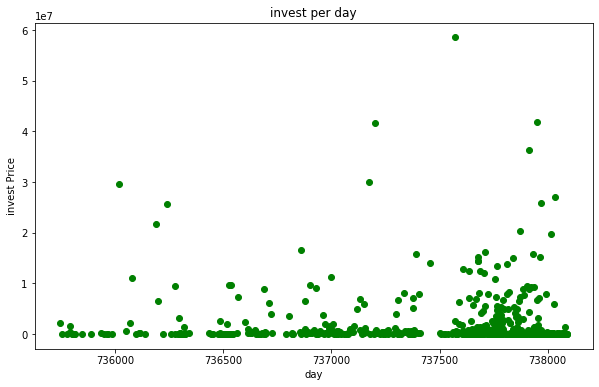

In [85]:
plt.figure(figsize=(10,6))
plt.xlabel('day')
plt.ylabel('invest Price')
plt.title('invest per day')
plt.scatter(x1,y1, marker='o', color='g')

In [86]:
df=df.reset_index()['DayAmount']

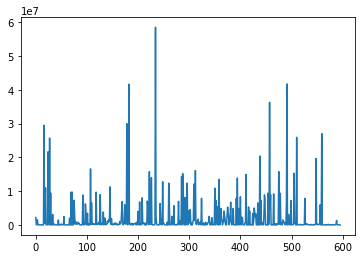

In [87]:
import matplotlib.pyplot as plt
plt.plot(df)

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [89]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [90]:
training_size,test_size

(447, 149)

In [91]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [92]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [93]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [94]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [95]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [96]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 9s 521ms/step - loss: 0.0086 - val_loss: 0.0071
Epoch 2/100
6/6 [==============================] - 1s 198ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 3/100
6/6 [==============================] - 1s 195ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 4/100
6/6 [==============================] - 1s 196ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 5/100
6/6 [==============================] - 1s 199ms/step - loss: 0.0082 - val_loss: 0.0069
Epoch 6/100
6/6 [==============================] - 1s 202ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 7/100
6/6 [==============================] - 1s 195ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 8/100
6/6 [==============================] - 1s 221ms/step - loss: 0.0082 - val_loss: 0.0068
Epoch 9/100
6/6 [==============================] - 1s 215ms/step - loss: 0.0082 - val_loss: 0.0068
Epoch 10/100
6/6 [==============================] - 1s 220ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 11/

6/6 [==============================] - 1s 189ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 84/100
6/6 [==============================] - 1s 190ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 85/100
6/6 [==============================] - 1s 214ms/step - loss: 0.0080 - val_loss: 0.0065
Epoch 86/100
6/6 [==============================] - 1s 199ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 87/100
6/6 [==============================] - 1s 203ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 88/100
6/6 [==============================] - 1s 198ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 89/100
6/6 [==============================] - 1s 218ms/step - loss: 0.0081 - val_loss: 0.0066
Epoch 90/100
6/6 [==============================] - 1s 216ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 91/100
6/6 [==============================] - 1s 205ms/step - loss: 0.0079 - val_loss: 0.0068
Epoch 92/100
6/6 [==============================] - 1s 193ms/step - loss: 0.0086 - val_loss: 0.0069
Epoch 93/100


In [97]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [98]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [99]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2200458.496974138

In [100]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2330123.4113306454

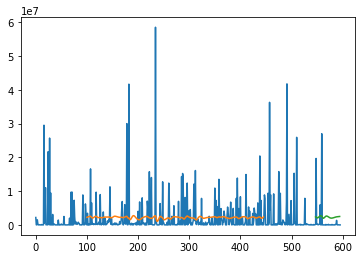

In [101]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [102]:
x_input=test_data[49:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04313936]
101
1 day input [2.05529469e-03 9.46873644e-04 1.22948255e-01 1.39426931e-04
 1.64097369e-03 8.95815894e-04 1.29667899e-03 3.67005407e-03
 2.61232791e-01 1.03239179e-02 1.31048747e-02 2.58703980e-04
 2.06348442e-04 4.43164187e-01 4.73009917e-05 1.12056545e-03
 4.67289400e-04 1.63077426e-03 1.51551011e-03 1.94642727e-03
 9.71634090e-05 3.05236544e-03 5.51389539e-04 5.00434247e-04
 3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492

6 day output [[0.04018911]]
7 day input [1.29667899e-03 3.67005407e-03 2.61232791e-01 1.03239179e-02
 1.31048747e-02 2.58703980e-04 2.06348442e-04 4.43164187e-01
 4.73009917e-05 1.12056545e-03 4.67289400e-04 1.63077426e-03
 1.51551011e-03 1.94642727e-03 9.71634090e-05 3.05236544e-03
 5.51389539e-04 5.00434247e-04 3.78407934e-05 1.70761703e-07
 1.32254939e-04 1.40536882e-04 3.08715028e-03 1.34631908e-01
 1.53856294e-03 4.70889228e-03 1.07161507e-03 5.31774142e-03
 2.85354759e-03 1.89467469e-03 9.13404350e-04 1.25134176e-03
 1.18679384e-04 1.21274962e-05 4.15377843e-04 2.54179137e-03
 7.82771647e-04 9.95540729e-05 6.47186855e-05 1.76055316e-04
 1.94849349e-03 1.06896826e-04 4.60885837e-04 1.38269235e-03
 2.40244640e-03 3.36287958e-01 3.77462409e-03 4.34651716e-03
 1.53702609e-03 1.09253406e-03 8.53637754e-04 4.44390256e-03
 3.48447418e-03 1.01932442e-01 1.74689222e-04 9.23667128e-04
 4.61466256e-01 4.30319492e-05 1.03932403e-03 8.70884686e-05
 3.62014811e-05 4.25196641e-05 1.34047937e-05

12 day output [[0.04247048]]
13 day input [2.06348442e-04 4.43164187e-01 4.73009917e-05 1.12056545e-03
 4.67289400e-04 1.63077426e-03 1.51551011e-03 1.94642727e-03
 9.71634090e-05 3.05236544e-03 5.51389539e-04 5.00434247e-04
 3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492e-05
 1.03932403e-03 8.70884686e-05 3.62014811e-05 4.25196641e-05
 1.34047937e-05 7.87211451e-05 2.20453871e-03 3.26154853e-05
 1.29591056e-03 4.83067782e-04 1.42074420e-

18 day output [[0.04093962]]
19 day input [1.51551011e-03 1.94642727e-03 9.71634090e-05 3.05236544e-03
 5.51389539e-04 5.00434247e-04 3.78407934e-05 1.70761703e-07
 1.32254939e-04 1.40536882e-04 3.08715028e-03 1.34631908e-01
 1.53856294e-03 4.70889228e-03 1.07161507e-03 5.31774142e-03
 2.85354759e-03 1.89467469e-03 9.13404350e-04 1.25134176e-03
 1.18679384e-04 1.21274962e-05 4.15377843e-04 2.54179137e-03
 7.82771647e-04 9.95540729e-05 6.47186855e-05 1.76055316e-04
 1.94849349e-03 1.06896826e-04 4.60885837e-04 1.38269235e-03
 2.40244640e-03 3.36287958e-01 3.77462409e-03 4.34651716e-03
 1.53702609e-03 1.09253406e-03 8.53637754e-04 4.44390256e-03
 3.48447418e-03 1.01932442e-01 1.74689222e-04 9.23667128e-04
 4.61466256e-01 4.30319492e-05 1.03932403e-03 8.70884686e-05
 3.62014811e-05 4.25196641e-05 1.34047937e-05 7.87211451e-05
 2.20453871e-03 3.26154853e-05 1.29591056e-03 4.83067782e-04
 1.42074420e-04 2.70732435e-03 8.34222148e-04 2.98662219e-04
 2.56142555e-07 4.68570113e-05 8.53637754e-

24 day output [[0.03840498]]
25 day input [3.78407934e-05 1.70761703e-07 1.32254939e-04 1.40536882e-04
 3.08715028e-03 1.34631908e-01 1.53856294e-03 4.70889228e-03
 1.07161507e-03 5.31774142e-03 2.85354759e-03 1.89467469e-03
 9.13404350e-04 1.25134176e-03 1.18679384e-04 1.21274962e-05
 4.15377843e-04 2.54179137e-03 7.82771647e-04 9.95540729e-05
 6.47186855e-05 1.76055316e-04 1.94849349e-03 1.06896826e-04
 4.60885837e-04 1.38269235e-03 2.40244640e-03 3.36287958e-01
 3.77462409e-03 4.34651716e-03 1.53702609e-03 1.09253406e-03
 8.53637754e-04 4.44390256e-03 3.48447418e-03 1.01932442e-01
 1.74689222e-04 9.23667128e-04 4.61466256e-01 4.30319492e-05
 1.03932403e-03 8.70884686e-05 3.62014811e-05 4.25196641e-05
 1.34047937e-05 7.87211451e-05 2.20453871e-03 3.26154853e-05
 1.29591056e-03 4.83067782e-04 1.42074420e-04 2.70732435e-03
 8.34222148e-04 2.98662219e-04 2.56142555e-07 4.68570113e-05
 8.53637754e-04 6.83046812e-07 2.17932916e-03 3.86619352e-04
 7.14057138e-04 6.38648769e-05 2.50848942e-

In [105]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

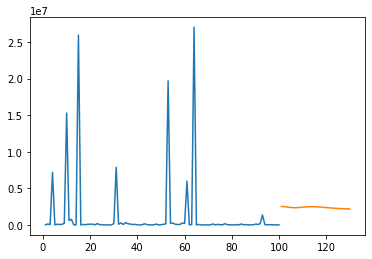

In [106]:
plt.plot(day_new,scaler.inverse_transform(df[496:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

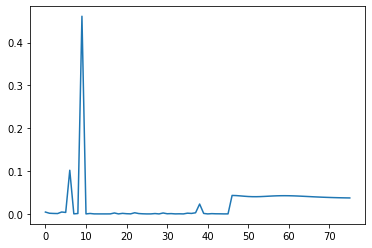

In [107]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[550:])

In [108]:
df1=scaler.inverse_transform(df1).tolist()

In [109]:
df1

[[2200000.0],
 [32499.999999999996],
 [11000.0],
 [1500000.0],
 [367452.0],
 [2200.0],
 [21000.0],
 [54000.0],
 [5000.0],
 [11000.0],
 [11000.0],
 [108500.0],
 [11000.0],
 [81000.0],
 [3400.0],
 [13000.0],
 [29543824.999999996],
 [525000.0],
 [2197000.0],
 [11037200.0],
 [8000.0],
 [100000.0],
 [131500.0],
 [8000.0],
 [21661500.0],
 [6606000.0],
 [60000.0],
 [25724000.0],
 [7000.0],
 [9480920.0],
 [5500.0],
 [49500.0],
 [10400.0],
 [3102507.12],
 [850.0],
 [42000.0],
 [280180.0],
 [132000.0],
 [6000.0],
 [13500.0],
 [17200.0],
 [15200.0],
 [12100.0],
 [750.0],
 [1445000.0],
 [11890.0],
 [120440.00000000001],
 [1900.0],
 [120.00000000000001],
 [122000.0],
 [266000.0],
 [12000.0],
 [72500.0],
 [30000.0],
 [28000.0],
 [2500615.0],
 [100340.0],
 [68.00000000000001],
 [20.0],
 [15000.0],
 [94.50000000000001],
 [1100.0],
 [360.0],
 [48000.0],
 [48000.0],
 [60.00000000000001],
 [2000000.0000000002],
 [400.0],
 [85.0],
 [9717400.0],
 [300.0],
 [9717400.0],
 [85.0],
 [780.0],
 [188282.5],
 [730

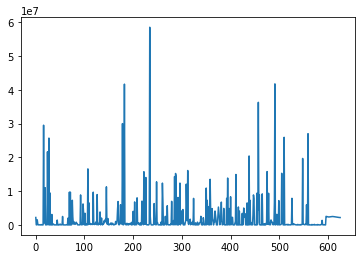

In [110]:
plt.plot(df1)

In [111]:
df1[597]

[2506563.682007268]

#some different step

In [112]:
i=0
for value in y1:
    if value==0.0:
        i=i+1
print(i)

0


In [113]:
# x_train,x_test,y_train,y_test=train_test_split(x1,y1)

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x1 = scaler.fit_transform(x1)

In [115]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.10,random_state=0)

In [116]:
x_train1.shape, x_test1.shape

((536, 1), (60, 1))

#LinearRegression

In [117]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train1,y_train1)


LinearRegression()

In [118]:
y_pred1=LR.predict(x_test1)

In [119]:
r2_score(y_test1,y_pred1)

-0.008465562641756241

In [120]:
round(LR.score(x_train1, y_train1) * 100, 2)

0.0

In [121]:
round(LR.score(x_test1, y_test1) * 100, 2)

-0.85

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
predict = scaler.fit_transform([[738091]])

In [123]:
LR.predict(predict)

array([1982002.28646653])

#random_forest

In [124]:
RFR=RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train1,y_train1)
y_pred1=RFR.predict(x_test1)
print(r2_score(y_test1,y_pred1))


-0.3876046200074552


In [125]:
round(RFR.score(x_train1, y_train1) * 100, 2)

79.21

In [126]:
round(RFR.score(x_test1, y_test1) * 100, 2)

-38.76

In [127]:
RFR.predict(predict)

array([1678830.52])

#decisionTree

In [128]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train1,y_train1)
y_pred1=DTR.predict(x_test1)
print(r2_score(y_test1,y_pred1))

-0.42021115194710856


In [129]:
round(DTR.score(x_train1, y_train1) * 100, 2)

100.0

In [130]:
round(DTR.score(x_test1, y_test1) * 100, 2)

-42.02

In [131]:
RFR.predict(predict)

array([1678830.52])

# SVR

In [132]:
SV=SVR()
SV.fit(x_train1,y_train1)
y_pred1=SV.predict(x_test1)
print(r2_score(y_test1,y_pred1))

-0.2729174315322098


In [133]:
round(SV.score(x_train1, y_train1) * 100, 2)

-11.43

In [134]:
round(SV.score(x_test1, y_test1) * 100, 2)

-27.29

In [135]:
SV.predict(predict)

array([128820.64133267])

In [136]:
####################################################

In [137]:
rnf1=RandomForestRegressor()
svr1=SVR()
lr1=LinearRegression()
dr1=DecisionTreeRegressor()

In [138]:
lr1.fit(x_train1,y_train1)
y_pred=lr1.predict(x_test1)
acc_lr1 = r2_score(y_test1,y_pred)

rnf1.fit(x_train1,x_train1)
y_pred=rnf1.predict(x_test1)
acc_rnf1 =r2_score(y_test1,y_pred)

svr1.fit(x_train1,y_train1)
y_pred=svr1.predict(x_test1)
acc_svr1 = r2_score(y_test1,y_pred)


dr1.fit(x_train1,y_train1)
y_pred=dr1.predict(x_test1)
acc_dr1 =r2_score(y_test1,y_pred)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6880/886423058.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnf1.fit(x_train1,x_train1)


In [139]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Rgression',
              'Random Forest Regression','Decision Tree Regression'],
    'Score': [acc_svr1, acc_lr1,
              acc_rnf1, acc_dr1]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Linear Rgression,-0.008466
0,Support Vector Machines,-0.272917
2,Random Forest Regression,-0.304503
3,Decision Tree Regression,-0.420211


In [140]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# value1 = scaler.fit_transform([[738091]])

In [141]:
# value1=[[738091]]

In [142]:
print("738091  orginal amount 122531 tk ")
lr_predict=lr1.predict(predict)
print("738091 predict amount ", lr_predict ,"tk of Linear Rgression")
rnf_predict=rnf1.predict(predict)
print("738091 predict amount ", rnf_predict, "tk of Random Forest Regression")
svr_predict=svr1.predict(predict)
print("738091 predict amount", svr_predict, "tk of Support Vector Machines")
dr_predict=dr1.predict(predict)
print("738091 predict amount", dr_predict, "tk of Decision Tree Regression")

738091  orginal amount 122531 tk 
738091 predict amount  [1982002.28646653] tk of Linear Rgression
738091 predict amount  [0.00766212] tk of Random Forest Regression
738091 predict amount [128820.64133267] tk of Support Vector Machines
738091 predict amount [2200000.] tk of Decision Tree Regression


In [143]:
##########################################################

# work Sale Dataset

In [144]:
sale_data

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
2095,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,1,101010041,40.0,350.0,14000.0,0.0,0.0,14000.0,10101,MILLENNIUM TEA TRADERS,COMBO BOX - 120GR (60bags),TEA,7,2,730432
2096,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,2,101010003,100.0,320.0,32000.0,0.0,0.0,32000.0,10101,MILLENNIUM TEA TRADERS,MTT-MCT-500 MILLENNIUM CLONE TEA 500 GM,TEA,7,2,730432
2097,101,SALE,2001-02-07,2001,20010001,10101.0,NaN,1.011030e+09,3,101010007,50.0,360.0,18000.0,0.0,0.0,18000.0,10101,MILLENNIUM TEA TRADERS,MTT-MBT-100 MILLENNIUM BLACK TEA 100GM,TEA,7,2,730432
2098,101,SALE,2018-02-27,2018,20180004,10102.0,NaN,1.011030e+09,1,101030393,110.0,220.0,24200.0,0.0,0.0,24200.0,10101,MILLENNIUM TEA TRADERS,MOTRI BOP,TEA,27,2,736657
2099,101,SALE,2018-02-27,2018,20180004,10102.0,NaN,1.011030e+09,2,101030144,55.0,202.0,11110.0,0.0,0.0,11110.0,10101,MILLENNIUM TEA TRADERS,KHADIM A/C GOOLNI OF,TEA,27,2,736657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87021,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,4,118030016,4.0,4300.0,17200.0,0.0,0.0,17200.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 42'X84''X6''X2.5'',DOOR,31,1,738091
87022,118,SALE,2022-01-31,2022,20220019,11801.0,NaN,1.181030e+09,5,118030014,1.0,5000.0,5000.0,0.0,0.0,5000.0,11801,Woodland Door Gallery,LOHA DOOR FRAME- 48'X84''X11''X2.5'',DOOR,31,1,738091
87023,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,1,118020006,2.0,16000.0,32000.0,0.0,0.0,32000.0,11801,Woodland Door Gallery,SEGUN CTG -39''X81''X1.5'',DOOR,1,2,738091
87024,118,SALE,2022-02-01,2022,20220020,11801.0,NaN,1.181030e+09,2,118050004,1.0,2660.0,2660.0,0.0,0.0,2660.0,11801,Woodland Door Gallery,BENGAL DOOR- 4'' (R),DOOR,1,2,738091


In [145]:
sale_data.CategoryName.unique()

array(['TEA', 'WATER HEATER (GEYSER) ', 'CHICKEN', 'CST TYRE',
       'INFUSION SET', 'BALL VALVE', 'ECG', 'USG', 'SIFANG', 'CHANGCHAI',
       'DONG FENG', 'IT ITEM', 'Fiber Optics', nan, 'REFLECTIVE GLASS',
       'SAFETY ITEM', 'OLD', 'BATTERY', 'SPARE PARTS', 'WOOD DOOR',
       'EXPORT ITEM', 'Local', 'DOOR'], dtype=object)

# Which category product sale more

In [146]:
new_sale=sale_data.groupby("CategoryName").sum()
new_sale

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
BALL VALVE,309,6051,60510074,30925.0,0.0,3.093090e+09,4,309440004,35.00,3.020000e+02,2.690000e+03,10.0,24.0,2.666000e+03,30936,82,27,2209507
BATTERY,41245,737671,7376762751,4125224.0,0.0,4.128260e+11,5492,41259775302,767.00,2.135434e+05,2.487100e+05,0.0,0.0,2.487100e+05,4126325,5300,2013,269315605
CHANGCHAI,22470,431638,4316398055,2247224.0,0.0,2.249204e+11,428,22502620695,6381.00,2.054272e+06,1.095777e+07,0.0,0.0,1.095777e+07,2247428,3206,571,157568206
CHICKEN,29767,583838,5838392530,2981741.0,0.0,2.979677e+11,352,29916280794,27281.00,2.962713e+06,5.987402e+08,2682.0,7914526.0,5.908257e+08,2976989,4532,1820,213160002
CST TYRE,1339,26221,262210220,134024.0,0.0,1.340339e+10,13,1342140019,35.00,3.340000e+02,1.026000e+03,70.0,21.6,1.004400e+03,134043,262,116,9574407
DONG FENG,105,2017,20170157,10501.0,0.0,1.051030e+09,1,105150003,1.00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,10501,25,4,736350
DOOR,4366,74814,748140432,436637.0,0.0,4.369811e+10,67,4367160787,103.00,4.145600e+05,9.504100e+05,0.0,0.0,9.504100e+05,436637,892,41,27309232
ECG,113464,2201883,21997725581,11347491.0,0.0,1.135764e+12,1905,113739150513,3638.17,3.614518e+08,4.207406e+08,0.0,0.0,4.207406e+08,11347491,16746,7377,803925351
EXPORT ITEM,17316,299108,2991090046,1731766.0,0.0,1.733124e+11,239,17318870264,166892.80,2.885834e+04,1.848071e+07,0.0,0.0,1.848071e+07,1731748,2645,1230,109213965


In [147]:
new_sale=new_sale[['Qty','Amount','Rate']]
new_sale

,Qty,Amount,Rate
CategoryName,,,
BALL VALVE,35.00,2.690000e+03,3.020000e+02
BATTERY,767.00,2.487100e+05,2.135434e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
CST TYRE,35.00,1.026000e+03,3.340000e+02
DONG FENG,1.00,0.000000e+00,0.000000e+00
DOOR,103.00,9.504100e+05,4.145600e+05
ECG,3638.17,4.207406e+08,3.614518e+08
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [148]:
#base on Qty
new_sale.sort_values(by='Qty', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
Local,981057.40,1.059305e+08,9.612502e+04
TEA,573128.30,1.556016e+08,2.305541e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
IT ITEM,15306.00,3.779059e+06,2.896424e+05
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06


In [149]:
#base on Qty
new_sale.sort_values(by='Amount', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
CHICKEN,27281.00,5.987402e+08,2.962713e+06
ECG,3638.17,4.207406e+08,3.614518e+08
TEA,573128.30,1.556016e+08,2.305541e+06
Local,981057.40,1.059305e+08,9.612502e+04
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
REFLECTIVE GLASS,192895.00,1.852943e+07,2.017500e+03
EXPORT ITEM,166892.80,1.848071e+07,2.885834e+04


In [150]:
new_sale.sort_values(by='Rate', ascending=False)

,Qty,Amount,Rate
CategoryName,,,
WATER HEATER (GEYSER),85647.00,7.366485e+08,3.929790e+08
ECG,3638.17,4.207406e+08,3.614518e+08
USG,617.00,3.191202e+07,3.159995e+07
SIFANG,3271.00,2.824603e+07,6.088032e+06
WOOD DOOR,1918.00,7.797526e+06,3.615653e+06
CHICKEN,27281.00,5.987402e+08,2.962713e+06
TEA,573128.30,1.556016e+08,2.305541e+06
CHANGCHAI,6381.00,1.095777e+07,2.054272e+06
SAFETY ITEM,92806.50,4.804147e+06,1.984217e+06


# ! yearly sale prediction  !

<AxesSubplot:xlabel='Year', ylabel='Amount'>

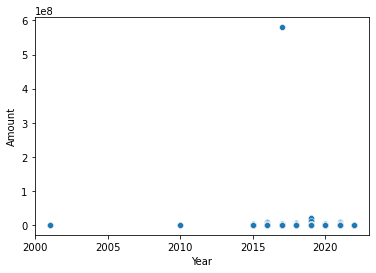

In [151]:
sns.scatterplot(x=sale_data.Year, y=sale_data.Amount, data=sale_data)

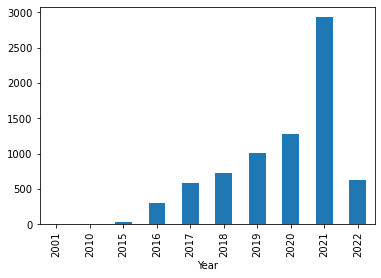

In [152]:
sale_data.groupby('Year')['Amount'].nunique().plot(kind='bar')
plt.show()

In [153]:
sale_year= {}
for year, year_data in sale_data.groupby('Year'):
            print(year, year_data['Amount'].sum())
            sale_year[year] =year_data['Amount'].sum() 

2001 64000.0
2010 8931.0
2015 8161219.99
2016 81238466.0
2017 729136463.0
2018 174193545.72
2019 264367315.92000002
2020 271000902.89
2021 655948598.35
2022 27384834.759999998


In [154]:
data2 = []
for year in sale_year:
    if(year!=2022):
        data2.append([year, sale_year[year]])

df = pd.DataFrame(data2, columns = ['Year', 'YearAmount'])
x = df.drop(['YearAmount'],axis='columns')
y = df.YearAmount

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [157]:
rnf=RandomForestRegressor()
svr=SVR()
lr=LinearRegression()
dr=DecisionTreeRegressor()

In [158]:
# lr.fit(x,y)
# acc_lr = round(lr.score(x, y) * 100, 2)

# rnf.fit(x,y)
# acc_rnf = round(rnf.score(x, y) * 100, 2)


# svr.fit(x,y)
# acc_svr = round(svr.score(x, y) * 100, 2)



# dr.fit(x,y)
# acc_dr = round(dr.score(x, y) * 100, 2)

In [159]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_lr=r2_score(y_test,y_pred)


rnf.fit(x_train,y_train)
y_pred=rnf.predict(x_test)
acc_rnf=r2_score(y_test,y_pred)

svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
acc_svr=r2_score(y_test,y_pred)

dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
acc_dr=r2_score(y_test,y_pred)

In [160]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Rgression',
              'Random Forest Regression','Decision Tree Regression'],
    'Score': [acc_svr, acc_lr,
              acc_rnf, acc_dr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree Regression,0.844125
0,Support Vector Machines,-0.069366
2,Random Forest Regression,-0.916862
1,Linear Rgression,-1.859094


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
value = scaler.fit_transform([[2022]])

In [162]:
print("2022 orginal amount 27384834.759999998 tk ")
lr_predict=lr.predict(value)
print("2022 predict amount", lr_predict ,"tk of Linear Rgression")
rnf_predict=rnf.predict(value)
print("2022 predict amount", rnf_predict,"tk of Random Forest Regression")
svr_predict=svr.predict(value)
print("2022 predict amount", svr_predict, "tk of Support Vector Machines")
dr_predict=dr.predict(value)
print("2022 predict amount", dr_predict, "tk of Decision Tree Regression")

2022 orginal amount 27384834.759999998 tk 
2022 predict amount [-1.01722559e+08] tk of Linear Rgression
2022 predict amount [25978376.49] tk of Random Forest Regression
2022 predict amount [1.74193543e+08] tk of Support Vector Machines
2022 predict amount [64000.] tk of Decision Tree Regression


# day sale prediction

In [163]:
sale_day= {}
for day, day_data in sale_data.groupby('Day'):
            print(day, day_data['Amount'].sum())
            sale_day[day] =day_data['Amount'].sum() 

730432 64000.0
733801 8931.0
735682 0.0
735747 35000.0
735748 325000.0
735754 2000.0
735755 17000.0
735758 80000.0
735760 230000.0
735761 17000.0
735762 29000.0
735765 206000.0
735774 20500.0
735776 6000.0
735778 15000.0
735783 889000.0
735785 6000.0
735786 12000.0
735789 204320.0
735792 2490000.0
735796 1200000.0
735800 6000.0
735806 170000.0
735810 191700.0
735812 15000.0
735814 5000.0
735817 1025000.0
735824 649999.99
735827 30000.0
735830 7000.0
735833 25000.0
735835 8700.0
735837 30000.0
735843 6000.0
735847 0.0
735852 17000.0
735854 105000.0
735858 50000.0
735861 36000.0
735875 620000.0
735876 15000.0
735881 3000.0
735884 710000.0
735889 170000.0
735890 370000.0
735891 3000.0
735900 18370000.0
735901 80800.0
735909 2667000.0
735911 140000.0
735915 12800.0
735917 235000.0
735925 6000.0
735929 10000.0
735933 114000.0
735936 165000.0
735940 725000.0
735943 15000.0
735957 100000.0
735958 220000.0
735961 30000.0
735963 220000.0
735964 9800.0
735965 95000.0
735969 8700.0
735970 2500.0


736637 47950.0
736638 44750.5
736639 390.0
736640 329395.0
736641 189406.0
736642 29947.0
736643 36287.0
736644 392420.0
736645 69710.0
736646 76500.0
736647 76840.0
736648 1515325.0
736649 1990490.0
736650 76675.0
736651 54306.2
736652 125000.0
736654 155730.0
736655 18100.0
736656 80764.0
736657 101458.2
736658 43360.0
736661 50610.0
736662 10200.0
736663 115437.0
736664 921270.0
736665 134268.2
736666 501410.0
736667 147514.9
736668 2474584.0
736669 7650.0
736670 118500.0
736671 77834.0
736672 5225342.0
736673 241336.0
736674 71000.0
736675 680.0
736676 27000.0
736677 111830.0
736678 84541.0
736679 15350.0
736680 44020.0
736681 42880.0
736682 6540.0
736684 128305.0
736685 136310.0
736686 79790.0
736687 78350.0
736688 67677.0
736689 3244010.0
736690 20000.0
736691 145805.0
736692 3077892.0
736693 7380.0
736694 22060.0
736695 1845590.0
736696 17100.0
736697 723877.0
736698 733490.0
736699 425590.0
736700 58380.0
736701 15005.0
736702 19630.0
736703 17840.0
736704 16970.0
736705 89680.

737251 225270.0
737252 228165.0
737254 557492.8
737255 134045.35
737256 841307.4
737257 250895.0
737258 313207.0
737259 231899.0
737260 55635.0
737261 194235.0
737262 290256.99
737263 831430.0
737264 488071.0
737265 404779.4
737266 1291660.0
737267 281500.0
737268 368388.95
737269 13337511.1
737270 654342.0
737271 331610.0
737272 1230300.0
737273 23000.0
737274 74083.54000000001
737275 190799.12
737276 807433.0
737277 526729.2
737278 219510.0
737279 1036505.0
737280 46000.0
737281 1995771.63
737282 370282.51
737283 1090485.0
737284 353105.0
737285 210913.0
737286 862468.5
737287 551415.86
737288 617325.0
737289 1136467.0
737290 854100.0
737291 250221.5
737292 179545.0
737293 275268.49
737294 40000.0
737295 2452125.5300000003
737296 469247.0
737297 791968.0
737298 541950.0
737299 774821.0
737300 372877.0
737302 511466.0
737303 288570.0
737304 533716.0
737305 118256.0
737306 274361.0
737307 709698.0
737308 49000.0
737309 1023534.72
737310 1201420.85
737311 674900.0
737312 1452650.0
73731

737811 1804040.0
737812 1596187.99
737813 877801.0
737814 3073966.0
737815 2564780.0
737816 38742.0
737817 339863.07
737818 823181.99
737819 157728.0
737820 454719.0
737821 885957.0
737822 1335205.0
737823 1193286.0
737824 439372.0
737825 1699106.0
737826 1109179.0
737827 847427.0
737828 155.0
737832 55215.0
737833 1087290.0
737834 1330303.08
737835 1231090.0
737836 555.0
737837 1598474.0
737838 446990.0
737839 2025224.0
737840 2552820.3
737841 470303.0
737842 2000860.1600000001
737843 108128.0
737844 6545417.07
737845 1146418.0
737846 6537873.0
737847 1310208.08
737848 5135112.0
737849 295250.0
737850 5403529.0
737851 7658826.1
737852 7402511.0
737853 515101.0
737854 449250.0
737855 666438.0
737856 296005.0
737857 1223600.07
737858 440249.0
737859 1044602.04
737860 1686607.0
737861 670050.0
737862 1575668.0
737863 332580.0
737864 2136218.0
737865 3860224.0
737866 1026078.0
737867 897425.0
737868 1790279.0
737869 1443836.0
737870 22133455.0
737871 1966956.0
737872 2241953.0
737873 3933

In [164]:
data4 = []
for day in sale_day:
    if(day!=738091):
        data4.append([day, sale_day[day]])

df = pd.DataFrame(data4, columns = ['Day', 'DayAmount'])
x2 = df.drop(['DayAmount'],axis='columns')
y2 = df.DayAmount

In [165]:
data4

[[730432, 64000.0],
 [733801, 8931.0],
 [735682, 0.0],
 [735747, 35000.0],
 [735748, 325000.0],
 [735754, 2000.0],
 [735755, 17000.0],
 [735758, 80000.0],
 [735760, 230000.0],
 [735761, 17000.0],
 [735762, 29000.0],
 [735765, 206000.0],
 [735774, 20500.0],
 [735776, 6000.0],
 [735778, 15000.0],
 [735783, 889000.0],
 [735785, 6000.0],
 [735786, 12000.0],
 [735789, 204320.0],
 [735792, 2490000.0],
 [735796, 1200000.0],
 [735800, 6000.0],
 [735806, 170000.0],
 [735810, 191700.0],
 [735812, 15000.0],
 [735814, 5000.0],
 [735817, 1025000.0],
 [735824, 649999.99],
 [735827, 30000.0],
 [735830, 7000.0],
 [735833, 25000.0],
 [735835, 8700.0],
 [735837, 30000.0],
 [735843, 6000.0],
 [735847, 0.0],
 [735852, 17000.0],
 [735854, 105000.0],
 [735858, 50000.0],
 [735861, 36000.0],
 [735875, 620000.0],
 [735876, 15000.0],
 [735881, 3000.0],
 [735884, 710000.0],
 [735889, 170000.0],
 [735890, 370000.0],
 [735891, 3000.0],
 [735900, 18370000.0],
 [735901, 80800.0],
 [735909, 2667000.0],
 [735911, 1400

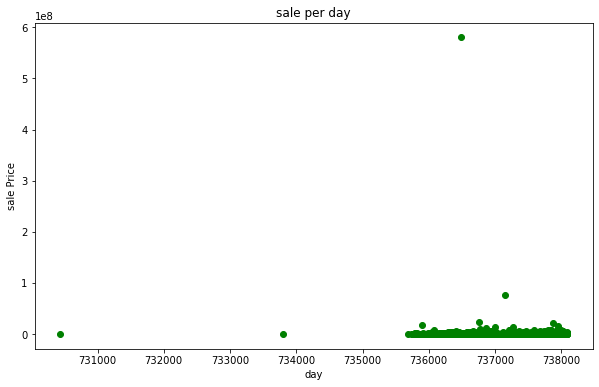

In [166]:
plt.figure(figsize=(10,6))
plt.xlabel('day')
plt.ylabel('sale Price')
plt.title('sale per day')
plt.scatter(x2,y2, marker='o', color='g')

In [167]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
x2 = scaler.fit_transform(x2)

In [168]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# x2 = scaler.fit_transform(x2)

In [169]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.20,random_state=0)

In [170]:
from sklearn.linear_model import LinearRegression
LR2=LinearRegression()
LR2.fit(x_train2,y_train2)

LinearRegression()

In [171]:
y_pred2=LR2.predict(x_test2)

In [172]:
r2_score(y_test2,y_pred2)

-0.011615498656707413

In [173]:
round(LR2.score(x_train2, y_train2) * 100, 2)

0.0

In [174]:
round(LR2.score(x_test2, y_test2) * 100, 2)

-1.16

In [175]:
predict=scaler.fit_transform([[738091]])

In [176]:
LR2.predict(predict)

array([1204275.50692215])

# Iiss_data set/ issues data set

In [177]:
Iiss_data

,CompanyId,Type,Date,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,CompanyName,ItemName,CategoryName,day,month,Day
601,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,1,101030183,55.0,230.0,12650.0,0.0,0.0,12650.0,10101,MILLENNIUM TEA TRADERS,OODALEAH BOP,TEA,1,1,736601
602,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,2,101030047,30.0,230.0,6900.0,0.0,0.0,6900.0,10101,MILLENNIUM TEA TRADERS,DILDARPUR BOP,TEA,1,1,736601
603,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,3,101030142,55.0,230.0,12650.0,0.0,0.0,12650.0,10101,MILLENNIUM TEA TRADERS,KHADIM A/C GOOLNI BOP EX 1025,TEA,1,1,736601
604,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,4,101030154,25.0,230.0,5750.0,0.0,0.0,5750.0,10101,MILLENNIUM TEA TRADERS,DAURACHERRA BOP,TEA,1,1,736601
605,101,IISS,2018-01-01,2018,20180001,10102.0,NaN,NaN,5,101030382,20.0,230.0,4600.0,0.0,0.0,4600.0,10101,MILLENNIUM TEA TRADERS,JAFFLONG BOP,TEA,1,1,736601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58998,106,IISS,2022-01-18,2022,20220097,10602.0,NaN,NaN,1,106090172,1.0,0.0,0.0,0.0,0.0,0.0,10601,Padma LPG Limited-Factory,WATER PROOF BOX,NaN,18,1,738078
58999,106,IISS,2022-01-07,2022,20220098,10602.0,NaN,NaN,1,106090038,8.0,0.0,0.0,0.0,0.0,0.0,10601,Padma LPG Limited-Factory,CABAL (ELECATRICAL),NaN,7,1,738067
59000,106,IISS,2022-01-11,2022,20220099,10606.0,NaN,NaN,1,106110015,16.0,0.0,0.0,0.0,0.0,0.0,10601,Padma LPG Limited-Factory,HOSE Clum,NaN,11,1,738071
73237,111,IISS,2021-11-30,2021,20210001,11101.0,NaN,NaN,1,111080018,55.0,8.5,467.5,0.0,0.0,467.5,11101,S.L. Corporation,HAND GLOVES(GEANS),SAFETY ITEM,30,11,738025


In [178]:
new_issu=Iiss_data.groupby("CategoryName").sum()
new_issu

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
CHICKEN,3605,70679,706790150,360981.0,0.0,0.0,42,3616690106,2924.00,129365.00,540865.00,0.0,0.0,540865.00,360535,550,219,25804955
OLD,112,2021,20210001,11201.0,0.0,0.0,1,112010001,300.00,55.00,16500.00,0.0,0.0,16500.00,11201,25,1,737720
SAFETY ITEM,111,2021,20210001,11101.0,0.0,0.0,1,111080018,55.00,8.50,467.50,0.0,0.0,467.50,11101,30,11,738025
TEA,97970,1958214,19582166412,9738405.0,0.0,0.0,7641,97999296657,122837.03,272619.44,35232048.67,0.0,0.0,35232048.67,9797970,14561,4641,714901901


In [179]:
new_issu.sort_values(by='Qty', ascending=False)

,CompanyId,Year,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
CategoryName,,,,,,,,,,,,,,,,,,
TEA,97970,1958214,19582166412,9738405.0,0.0,0.0,7641,97999296657,122837.03,272619.44,35232048.67,0.0,0.0,35232048.67,9797970,14561,4641,714901901
CHICKEN,3605,70679,706790150,360981.0,0.0,0.0,42,3616690106,2924.00,129365.00,540865.00,0.0,0.0,540865.00,360535,550,219,25804955
OLD,112,2021,20210001,11201.0,0.0,0.0,1,112010001,300.00,55.00,16500.00,0.0,0.0,16500.00,11201,25,1,737720
SAFETY ITEM,111,2021,20210001,11101.0,0.0,0.0,1,111080018,55.00,8.50,467.50,0.0,0.0,467.50,11101,30,11,738025


In [180]:
new_issu=Iiss_data.groupby("Year").sum()
new_issu

,CompanyId,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
Year,,,,,,,,,,,,,,,,,
2017,824,161360036,82501.0,0.0,0.0,8,826410014,201.00,807.00,8065.00,0.0,0.0,8065.00,82408,129,77,5892079
2018,44343,8859034087,4374578.0,0.0,0.0,3450,44356418251,41715.70,120010.05,10826451.46,0.0,0.0,10826451.46,4434739,5524,2596,323437634
2019,36373,7228032980,3638346.0,0.0,0.0,3466,36389245424,92780.98,109629.40,16670330.17,0.0,0.0,16670330.17,3637658,6920,1826,263884430
2020,96497,18604359829,9656618.0,0.0,0.0,2575,96628193484,923156.35,155039.99,8158307.04,0.0,0.0,8158307.04,9650621,15216,7587,679296126
2021,275363,52507054586,27548492.0,0.0,0.0,7888,275722035730,551197.96,16561.50,126727.50,0.0,0.0,126727.50,27538898,38414,18056,1917033764
2022,29468,5621171905,2947684.0,0.0,0.0,1063,29501213587,9500.00,0.00,0.00,0.0,0.0,0.00,2947078,3953,282,205184753


In [181]:
new_issu.sort_values(by='Qty', ascending=False)

,CompanyId,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
Year,,,,,,,,,,,,,,,,,
2020,96497,18604359829,9656618.0,0.0,0.0,2575,96628193484,923156.35,155039.99,8158307.04,0.0,0.0,8158307.04,9650621,15216,7587,679296126
2021,275363,52507054586,27548492.0,0.0,0.0,7888,275722035730,551197.96,16561.50,126727.50,0.0,0.0,126727.50,27538898,38414,18056,1917033764
2019,36373,7228032980,3638346.0,0.0,0.0,3466,36389245424,92780.98,109629.40,16670330.17,0.0,0.0,16670330.17,3637658,6920,1826,263884430
2018,44343,8859034087,4374578.0,0.0,0.0,3450,44356418251,41715.70,120010.05,10826451.46,0.0,0.0,10826451.46,4434739,5524,2596,323437634
2022,29468,5621171905,2947684.0,0.0,0.0,1063,29501213587,9500.00,0.00,0.00,0.0,0.0,0.00,2947078,3953,282,205184753
2017,824,161360036,82501.0,0.0,0.0,8,826410014,201.00,807.00,8065.00,0.0,0.0,8065.00,82408,129,77,5892079


In [182]:
new_issu=new_issu.reset_index()
new_issu

,Year,CompanyId,TransactionNo,StoreFr,StoreTo,PartyId,ItemSl,ItemId,Qty,Rate,Amount,DiscountRate,DiscountAmount,GrossAmount,CategoryId,day,month,Day
0,2017,824,161360036,82501.0,0.0,0.0,8,826410014,201.00,807.00,8065.00,0.0,0.0,8065.00,82408,129,77,5892079
1,2018,44343,8859034087,4374578.0,0.0,0.0,3450,44356418251,41715.70,120010.05,10826451.46,0.0,0.0,10826451.46,4434739,5524,2596,323437634
2,2019,36373,7228032980,3638346.0,0.0,0.0,3466,36389245424,92780.98,109629.40,16670330.17,0.0,0.0,16670330.17,3637658,6920,1826,263884430
3,2020,96497,18604359829,9656618.0,0.0,0.0,2575,96628193484,923156.35,155039.99,8158307.04,0.0,0.0,8158307.04,9650621,15216,7587,679296126
4,2021,275363,52507054586,27548492.0,0.0,0.0,7888,275722035730,551197.96,16561.50,126727.50,0.0,0.0,126727.50,27538898,38414,18056,1917033764
5,2022,29468,5621171905,2947684.0,0.0,0.0,1063,29501213587,9500.00,0.00,0.00,0.0,0.0,0.00,2947078,3953,282,205184753


In [183]:
new_issu=new_issu[['Year','Qty']]

In [184]:
x=new_issu.drop(["Qty"],axis=1)

In [185]:
y=new_issu["Qty"]

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
value = scaler.fit_transform([[2022]])

In [189]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(r2_score(y_test,y_pred))
print(LR.predict(value))

-0.4490769532434169
[44054.33050847]


In [190]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
print(r2_score(y_test,y_pred))
print(RFR.predict(value))

0.3260872372071161
[43579.103]


In [191]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_pred=DTR.predict(x_test)
print(r2_score(y_test,y_pred))
print(DTR.predict(value))

0.6394137426307127
[201.]


In [192]:
new_issu=new_issu[new_issu['Year']<2022]

In [193]:
new_issu

,Year,Qty
0,2017,201.00
1,2018,41715.70
2,2019,92780.98
3,2020,923156.35
4,2021,551197.96


In [194]:
x=new_issu.drop(["Qty"],axis=1)
x.shape

(5, 1)

In [195]:
y=new_issu["Qty"]

In [196]:
y.shape

(5,)

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [198]:
LR=LinearRegression()

In [199]:
LR.fit(x,y)

LinearRegression()

In [200]:
LR.score(x,y)

0.6065618141362794

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
value = scaler.fit_transform([[2022]])

In [202]:
LR.predict(value)

array([-74876.516])

In [203]:
RFR=RandomForestRegressor()
RFR.fit(x,y)

RandomForestRegressor()

In [204]:
RFR.score(x,y)

0.9042658709720091

In [205]:
RFR.predict(value)

array([25139.8919])

In [206]:
DTR=DecisionTreeRegressor()
DTR.fit(x,y)

DecisionTreeRegressor()

In [207]:
DTR.score(x,y)

1.0

In [208]:
DTR.predict(value)

array([201.])